# ANALISIS EXPLORATORIO DE DATOS (EDA)
## ANALISIS DESCRIPTIVO

In [1]:
#===================================
#1. SUBIR ARCHIVOS A COLAB
#https://www.google.com/url?sa=D&q=https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad_aire_historico/1284212629698.csv&ust=1763851980000000&usg=AOvVaw10Akccml2IFgfgcwu0X-Kl&hl=es
#=====================================
from google.colab import files
import pandas as pd
uploaded =files.upload()
file_name=list(uploaded.keys())[0]
print("Aechivo cargado:",file_name)
df=pd.read_csv(file_name,sep=';')
df.head()


Saving calidad-del-aire-datos-historicos-diarios.csv to calidad-del-aire-datos-historicos-diarios.csv
Aechivo cargado: calidad-del-aire-datos-historicos-diarios.csv


,Fecha,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),PM25 (ug/m3),SO2 (ug/m3),Provincia,Estación,Latitud,Longitud,Posición
0,2020-12-31,NaN,1.0,1.0,53.0,1.0,1.0,3.0,Palencia,C.T.G. - Compuerto,42.849167,-4.835833,"42.8491666667,-4.83583333333"
1,2020-12-31,NaN,5.0,3.0,57.0,4.0,NaN,3.0,Palencia,Hontoria 2 - Venta de Baños,41.948056,-4.465833,"41.9480555556,-4.46583333333"
2,2020-12-31,NaN,2.0,21.0,41.0,NaN,NaN,NaN,Valladolid,Michelin1,41.666389,-4.715000,"41.6663888889,-4.715"
3,2020-12-31,NaN,1.0,9.0,44.0,NaN,NaN,NaN,Valladolid,VALLADOLID SUR,41.611389,-4.772222,"41.6113888889,-4.77222222222"
4,2020-12-31,NaN,1.0,1.0,81.0,NaN,NaN,2.0,Salamanca,El Maillo,40.569444,-6.223889,"40.5694444444,-6.22388888889"


In [2]:
df.head(2)
print("="*100)
#Mostrar la estructura del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Fecha         446014 non-null  object 
 1   CO (mg/m3)    101158 non-null  float64
 2   NO (ug/m3)    415030 non-null  float64
 3   NO2 (ug/m3)   413497 non-null  float64
 4   O3 (ug/m3)    275414 non-null  float64
 5   PM10 (ug/m3)  344579 non-null  float64
 6   PM25 (ug/m3)  53784 non-null   float64
 7   SO2 (ug/m3)   356277 non-null  float64
 8   Provincia     446014 non-null  object 
 9   Estación      446014 non-null  object 
 10  Latitud       445788 non-null  float64
 11  Longitud      445788 non-null  float64
 12  Posición      445788 non-null  object 
dtypes: float64(9), object(4)
memory usage: 44.2+ MB
None


In [3]:
#Mostrar un resumen estadístico de las variables numéricas
print(df.describe())


          CO (mg/m3)     NO (ug/m3)    NO2 (ug/m3)     O3 (ug/m3)  \
count  101158.000000  415030.000000  413497.000000  275414.000000   
mean        0.854624      13.225808      21.409154      52.619754   
std         0.785226      21.970729      19.108434      23.221958   
min         0.000000    -441.000000       0.000000       0.000000   
25%         0.300000       2.000000       8.000000      37.000000   
50%         0.700000       5.000000      16.000000      54.000000   
75%         1.100000      15.000000      29.000000      68.000000   
max        25.100000     634.000000     249.000000     999.000000   

        PM10 (ug/m3)  PM25 (ug/m3)    SO2 (ug/m3)        Latitud  \
count  344579.000000  53784.000000  356277.000000  445788.000000   
mean       22.694662     13.677172       9.092801      42.151547   
std        17.919319     15.895495      13.790750       0.665501   
min         0.000000      0.000000    -791.000000      38.938333   
25%        11.000000      5.000000    

9


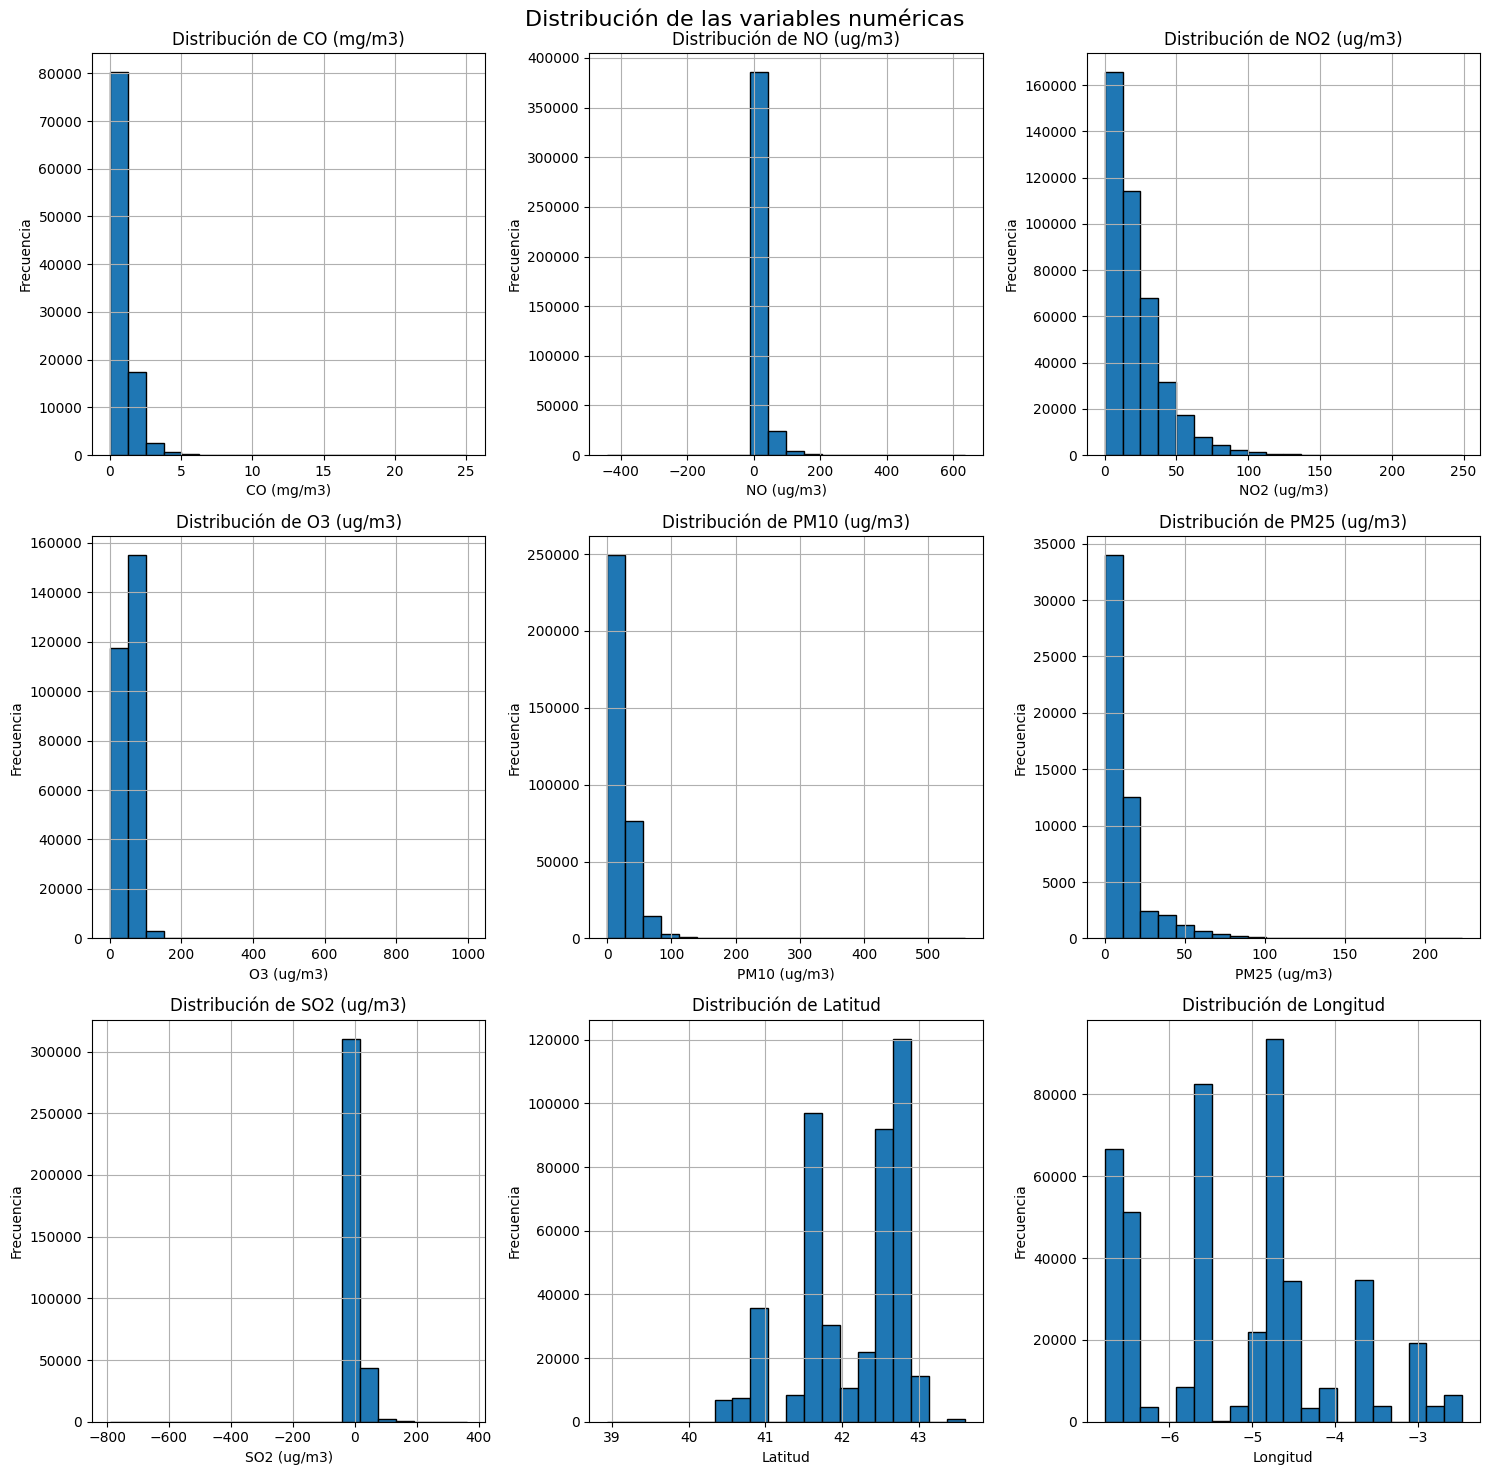

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#seleccionar solo las columnas numéricas
numeric_cols=df.select_dtypes(include=np.number).columns
n=len(numeric_cols)
print(n)
nrows=3
ncols=min(n,3)
# Crear la fifura y los subplots
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,5*nrows))
fig.suptitle('Distribución de las variables numéricas',fontsize=16)
#Aplanar el array de ejes en caso de que se 2D
axes=axes.flatten() if n>3 else [axes]
#crear histogramas para cada variable numérica
for i,col in enumerate(numeric_cols):
  ax=axes[i]
  df[col].hist(bins=20,ax=ax,edgecolor='black')
  ax.set_title(f'Distribución de {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frecuencia')

# ocultar subplots vacías si los hay

for j in range(i+1,len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()



In [5]:
#df.info() inspección de datos asignados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Fecha         446014 non-null  object 
 1   CO (mg/m3)    101158 non-null  float64
 2   NO (ug/m3)    415030 non-null  float64
 3   NO2 (ug/m3)   413497 non-null  float64
 4   O3 (ug/m3)    275414 non-null  float64
 5   PM10 (ug/m3)  344579 non-null  float64
 6   PM25 (ug/m3)  53784 non-null   float64
 7   SO2 (ug/m3)   356277 non-null  float64
 8   Provincia     446014 non-null  object 
 9   Estación      446014 non-null  object 
 10  Latitud       445788 non-null  float64
 11  Longitud      445788 non-null  float64
 12  Posición      445788 non-null  object 
dtypes: float64(9), object(4)
memory usage: 44.2+ MB


In [6]:
# Ajustar el tipo de la variable Fecha. permite operaciones temporales como cálculo de intervalos
df['Fecha']=pd.to_datetime(df['Fecha'],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Fecha         446014 non-null  datetime64[ns]
 1   CO (mg/m3)    101158 non-null  float64       
 2   NO (ug/m3)    415030 non-null  float64       
 3   NO2 (ug/m3)   413497 non-null  float64       
 4   O3 (ug/m3)    275414 non-null  float64       
 5   PM10 (ug/m3)  344579 non-null  float64       
 6   PM25 (ug/m3)  53784 non-null   float64       
 7   SO2 (ug/m3)   356277 non-null  float64       
 8   Provincia     446014 non-null  object        
 9   Estación      446014 non-null  object        
 10  Latitud       445788 non-null  float64       
 11  Longitud      445788 non-null  float64       
 12  Posición      445788 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 44.2+ MB


In [7]:
#==,=====================================================================================
#Las variables proviencia y estación representan variables categóricas, el cambio permite
#optimizar el uso de memoria como el rendimiento computacinal
#========================================================================================
print(df['Provincia'].unique())
df['Provincia']=df['Provincia'].astype('category')


['Palencia' 'Valladolid' 'Salamanca' 'Burgos' 'Soria' 'León' 'Zamora'
 'Avila' 'Segovia' 'Madrid']


In [8]:
print(df['Estación'].unique())
df['Estación']=df['Estación'].astype('category')

['C.T.G. - Compuerto' 'Hontoria 2 - Venta de Baños' 'Michelin1'
 'VALLADOLID SUR' 'El Maillo' 'Arco de ladrillo II'
 'Puente Poniente-Mº Luisa Sánchez' 'Miranda de Ebro2' 'Soria'
 'C.T.L.R. - Cuadros' 'Otero' 'Medina de Pomar' 'Aranda de Duero 2'
 'Lario' 'Palencia 3' 'Zamora 2' 'Avila II' 'Salamanca6' 'Renault2'
 'Tudela Veguin-Tudela Veguin' 'Hontoria 1 - Poblado' 'Salamanca5'
 'Vega Sicilia' 'Burgos4' 'Segovia 2' 'La Robla' 'Valderas' 'Michelin2'
 'C.T.L.R. - Ventosilla' 'Muriel de la Fuente' 'Leon 4' 'Renault1'
 'Burgos1' 'Guardo' 'La rubia II' 'Leon1' 'C.T.G. - Villalba'
 'Ponferrada4' 'C.T.L.R. - Naredo' 'Carracedelo' 'Renault4'
 'Medina del Campo' 'Toral de los Vados' 'Renault3'
 'C.T.Compostilla-Congosto' 'C.T.Compostilla-Cortiguera'
 'C.T.Compostilla-Compostilla' 'C.T.Compostilla-Santa Marina'
 'C.T.Compostilla-Villaverde' 'NH3' 'Miranda de Ebro1' 'Puente Regueral'
 'San Martín de Valdeiglesias' 'C.T.Anllares - Lillo'
 'C.T.Anllares - Susañe' 'C.T.Anllares - Palacios del Sil'


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Fecha         446014 non-null  datetime64[ns]
 1   CO (mg/m3)    101158 non-null  float64       
 2   NO (ug/m3)    415030 non-null  float64       
 3   NO2 (ug/m3)   413497 non-null  float64       
 4   O3 (ug/m3)    275414 non-null  float64       
 5   PM10 (ug/m3)  344579 non-null  float64       
 6   PM25 (ug/m3)  53784 non-null   float64       
 7   SO2 (ug/m3)   356277 non-null  float64       
 8   Provincia     446014 non-null  category      
 9   Estación      446014 non-null  category      
 10  Latitud       445788 non-null  float64       
 11  Longitud      445788 non-null  float64       
 12  Posición      445788 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(9), object(1)
memory usage: 38.3+ MB


In [10]:
# Detección y tratamientos de datos ausentes NaN
#Devuelve un DataFrame booleano
df.isna()
#Devuelve True si hay al menso un valor ausente en cada columna
df.isna().any()


,0
Fecha,False
CO (mg/m3),True
NO (ug/m3),True
NO2 (ug/m3),True
O3 (ug/m3),True
PM10 (ug/m3),True
PM25 (ug/m3),True
SO2 (ug/m3),True
Provincia,False
Estación,False


In [11]:
#Devuelve True si hay al menos un valor ausente
df.isna().any().any()

np.True_

In [12]:
#Devulve pot columna la cantidad de NaN
df.isna().sum()

,0
Fecha,0
CO (mg/m3),344856
NO (ug/m3),30984
NO2 (ug/m3),32517
O3 (ug/m3),170600
PM10 (ug/m3),101435
PM25 (ug/m3),392230
SO2 (ug/m3),89737
Provincia,0
Estación,0


In [13]:
#Devulve  la cantidad de NaN
df.isna().sum().sum()

np.int64(1163037)

In [14]:
#devuelve el % de valores perdidos
df.isna().mean()

,0
Fecha,0.000000
CO (mg/m3),0.773195
NO (ug/m3),0.069469
NO2 (ug/m3),0.072906
O3 (ug/m3),0.382499
PM10 (ug/m3),0.227426
PM25 (ug/m3),0.879412
SO2 (ug/m3),0.201198
Provincia,0.000000
Estación,0.000000


In [15]:
#devuelve el % de valores perdidos
df.isna().mean().round(2)

,0
Fecha,0.00
CO (mg/m3),0.77
NO (ug/m3),0.07
NO2 (ug/m3),0.07
O3 (ug/m3),0.38
PM10 (ug/m3),0.23
PM25 (ug/m3),0.88
SO2 (ug/m3),0.20
Provincia,0.00
Estación,0.00


In [16]:
#devuelve el % de valores perdidos
df.isna().mean().round(2)*100

,0
Fecha,0.0
CO (mg/m3),77.0
NO (ug/m3),7.0
NO2 (ug/m3),7.0
O3 (ug/m3),38.0
PM10 (ug/m3),23.0
PM25 (ug/m3),88.0
SO2 (ug/m3),20.0
Provincia,0.0
Estación,0.0


In [17]:
porc_nulos = (df.isna().mean() * 100).round(0).astype(int).astype(str) + '%'
df_porcentajes = porc_nulos.to_frame(name='porcentaje_nulos')
print(df_porcentajes)

             porcentaje_nulos
Fecha                      0%
CO (mg/m3)                77%
NO (ug/m3)                 7%
NO2 (ug/m3)                7%
O3 (ug/m3)                38%
PM10 (ug/m3)              23%
PM25 (ug/m3)              88%
SO2 (ug/m3)               20%
Provincia                  0%
Estación                   0%
Latitud                    0%
Longitud                   0%
Posición                   0%


In [18]:
#Guardar copia del dataset
calidad_aire_original=df.copy()

In [19]:
#Eliminar las variables que presentan un % de NaN superior 50%
df=df.loc[:,df.isna().mean()<0.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Fecha         446014 non-null  datetime64[ns]
 1   NO (ug/m3)    415030 non-null  float64       
 2   NO2 (ug/m3)   413497 non-null  float64       
 3   O3 (ug/m3)    275414 non-null  float64       
 4   PM10 (ug/m3)  344579 non-null  float64       
 5   SO2 (ug/m3)   356277 non-null  float64       
 6   Provincia     446014 non-null  category      
 7   Estación      446014 non-null  category      
 8   Latitud       445788 non-null  float64       
 9   Longitud      445788 non-null  float64       
 10  Posición      445788 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(7), object(1)
memory usage: 31.5+ MB


In [20]:
#seleccionamos las variables numéricas en una lista
columnas_numericas=df.select_dtypes(include=[np.number]).columns
print(columnas_numericas)

Index(['NO (ug/m3)', 'NO2 (ug/m3)', 'O3 (ug/m3)', 'PM10 (ug/m3)',
       'SO2 (ug/m3)', 'Latitud', 'Longitud'],
      dtype='object')


In [21]:
#calcular la media para cada una de las variables numéricas
media_columnas=df[columnas_numericas].mean()
print(media_columnas)

NO (ug/m3)      13.225808
NO2 (ug/m3)     21.409154
O3 (ug/m3)      52.619754
PM10 (ug/m3)    22.694662
SO2 (ug/m3)      9.092801
Latitud         42.151547
Longitud        -5.178965
dtype: float64


In [22]:
#sustituimos los valores NaN por la media
df[columnas_numericas]=df[columnas_numericas].fillna(media_columnas)

In [ ]:
#Devulve pot columna la cantidad de NaN
df.isna().sum()

,0
Fecha,0
NO (ug/m3),0
NO2 (ug/m3),0
O3 (ug/m3),0
PM10 (ug/m3),0
SO2 (ug/m3),0
Provincia,0
Estación,0
Latitud,0
Longitud,0


# Detección y tratamientos de datos atípicos
Un valor atípico u outlier representa una observación que exhibe una desviación significativa resecto al patrón general de comportamientos del resto de los datos

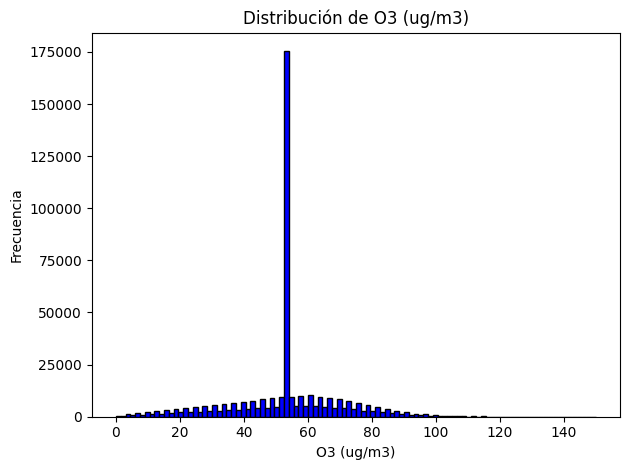

In [23]:
# variables continuas  para el ejemplo O3 (ug/m3)
#generar un histograma para conocer la distribución de frecuencias que presenta la variable de estudio
plt.hist(df['O3 (ug/m3)'],bins=100,range=(0,150),color='blue',edgecolor='black')
plt.title('Distribución de O3 (ug/m3)')
plt.xlabel('O3 (ug/m3)')
plt.ylabel('Frecuencia')
plt.tight_layout() # ajusta automáticamente el espacio entre elementos de la grafica para que nada quede cortado
plt.show()

# cajas boxplots una representación visual que describe la dispersión y simetría Estos gráficos están compuestos por tres componentes
1)Caja de rango intercuartílico (IQR) representa 50% entre 25%(Q1) al 75%(Q3)


2)Bigotes: se extiende desde ambos lados


3)valores atípicos


In [24]:
import seaborn as sns
Q1=df['O3 (ug/m3)'].quantile(0.25)
Q3=df['O3 (ug/m3)'].quantile(0.75)
IQR=Q3-Q1
limite_inferior=Q1-1.5*IQR
limite_superior=Q3+1.5*IQR
print("Estadística para O3 (ug/m3) ")
print(f"Q1={Q1}")
print(f"Q3={Q3}")
print(f"IQR={IQR}")
print(f"Q1-1.5*IQR={limite_inferior}")
print(f"Q3+1.5*IQR={limite_superior}")
print(f"Mediana={df['O3 (ug/m3)'].median():.2f}")
print(f"Número de observaciones:{len(df['O3 (ug/m3)'])}")
print(f"Número de outliers:{sum((df['O3 (ug/m3)'] < limite_inferior) | (df['O3 (ug/m3)'] > limite_superior ))}")
print(f"Número O3 (ug/m3) :{sum(df['O3 (ug/m3)'])}");
print(f"Número de outliers limite inferior:{sum(df['O3 (ug/m3)'] < limite_inferior)}");
print(f"Número de outliers limite superior:{sum(df['O3 (ug/m3)'] > limite_superior)}");
columna=df['O3 (ug/m3)']
print(f"Número de outliers:{sum( (columna < limite_inferior) | (columna > limite_superior))}")

Estadística para O3 (ug/m3) 
Q1=48.0
Q3=59.0
IQR=11.0
Q1-1.5*IQR=31.5
Q3+1.5*IQR=75.5
Mediana=52.62
Número de observaciones:446014
Número de outliers:91163
Número O3 (ug/m3) :23469147.07690241
Número de outliers limite inferior:51429
Número de outliers limite superior:39734
Número de outliers:91163


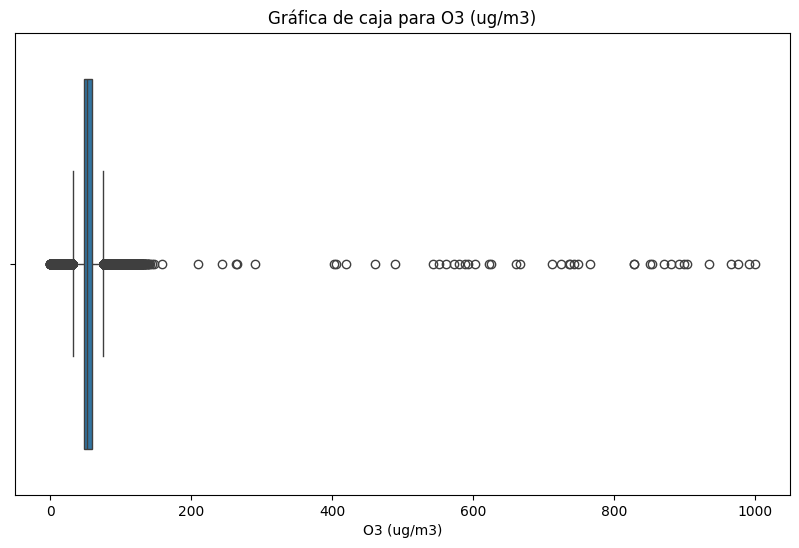

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['O3 (ug/m3)'])
plt.title('Gráfica de caja para O3 (ug/m3)')
plt.xlabel('O3 (ug/m3)')
plt.show()

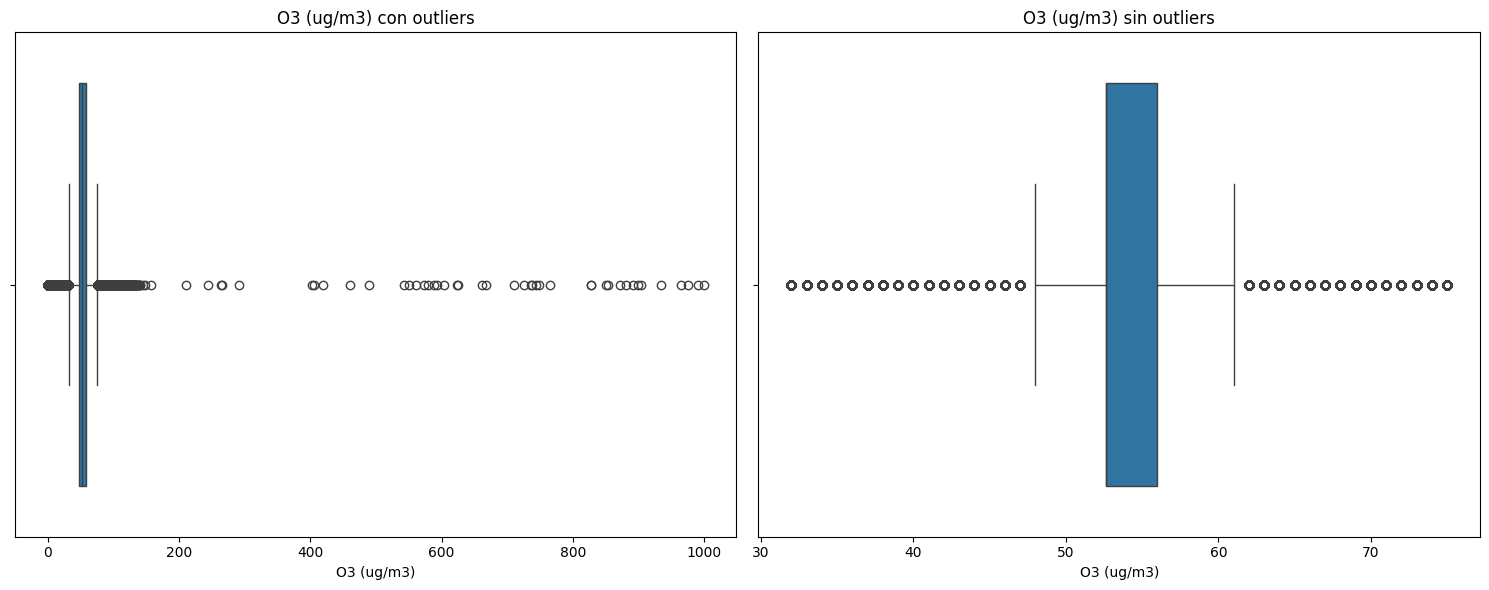

In [26]:
# Generar una nueva tabla que no contiene los valores identificados como atípicos
calidad_aire_No_outliers=df[(df['O3 (ug/m3)'] >= limite_inferior) & (df['O3 (ug/m3)']<=limite_superior)]
#contrucción de los gráficos de caja y bigotes
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))

sns.boxplot(x=df['O3 (ug/m3)'],ax=ax1)
ax1.set_title('O3 (ug/m3) con outliers')
ax1.set_xlabel('O3 (ug/m3)')
sns.boxplot(x=calidad_aire_No_outliers['O3 (ug/m3)'],ax=ax2)
ax2.set_title('O3 (ug/m3) sin outliers')
ax2.set_xlabel('O3 (ug/m3)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1756617644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_cantidad.index,y=categoria_cantidad.values,palette='viridis')


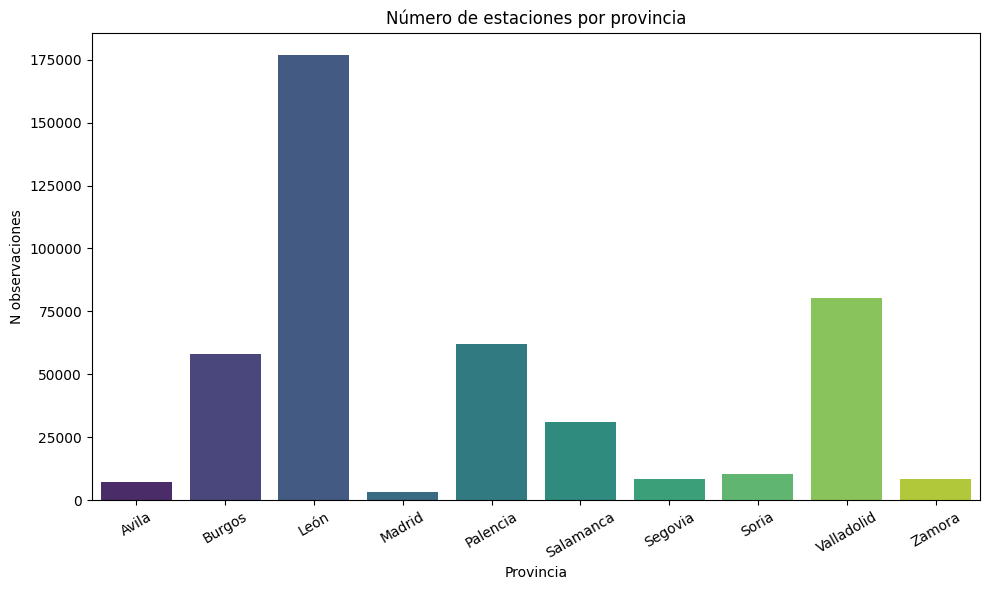

In [27]:
#Número de categorias que presenta la variable Provincias
categoria_cantidad=df['Provincia'].value_counts()
#construccíon del gráfico de barras para la variable provincias
plt.figure(figsize=(10,6))
sns.barplot(x=categoria_cantidad.index,y=categoria_cantidad.values,palette='viridis')
plt.title('Número de estaciones por provincia')
plt.xlabel('Provincia')
plt.ylabel('N observaciones')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Análisis de correlación entre variables
* Correlación positiva: si una variables aumenta y la otra también lo hace, un valor de (r) cercano a +1 indica una relación positova fuerte

* Correlación negativa: si una variable aumenta mientras la otra disminuye, un valor de (r) cercano a -1 indica una relación negativa fuerte

* sin correlación: un valor (r) cercano a cero sugire que no hay una relación lineal clara entre las variables

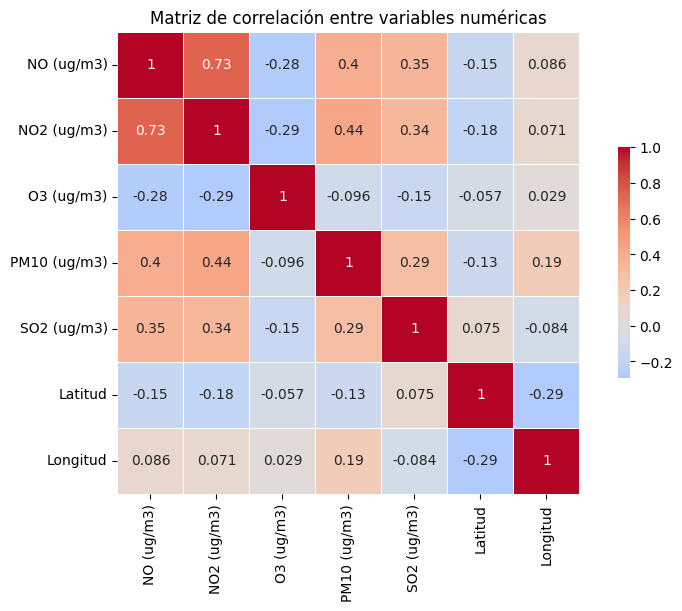

In [28]:
num_variables=df.select_dtypes(include=[np.number])
#Calcular la matriz de coeficientes de correlación entre las variables numéricas
correlacion=num_variables.corr()
#configuración del gráfico de correlacción
plt.figure(figsize=(10,6))
#Gráfica de correlaciones utilizando un mapa de calor
sns.heatmap(correlacion,annot=True,cmap='coolwarm',linewidths=0.5,center=0,square=True,cbar_kws={'shrink':0.5})
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

